<p><h2><font color = DarkBlue> Load the Data Set </font></h2></p>

In [10]:
# load the libraries required for data processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
HTrain = pd.read_csv("https://storage.googleapis.com/dimensionless/ML_with_Python/Chapter%203%20Linear%20Regression/housing_train.csv")
HTrain.shape

(16512, 9)

In [12]:
HTrain.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1.267645,-1.367976,0.346478,0.224718,0.214986,0.772251,0.322924,-0.321654,103000.0
1,0.703627,-0.871699,1.617807,0.342065,0.596500,-0.098440,0.670799,-0.030620,382100.0
2,-0.454356,-0.455012,-1.957806,-0.338639,-0.490815,-0.450778,-0.427755,0.150349,172600.0
3,1.227714,-1.377340,0.584852,-0.556832,-0.404974,-0.006602,-0.378059,-1.014947,93400.0
4,-0.114948,0.537543,1.141059,-0.116322,-0.252369,-0.486983,-0.312669,-0.166583,96500.0


In [13]:
HTrain.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-0.006282,0.005285,-0.002479,0.002861,0.003953,0.000862,0.001170,0.005308,207194.693738
std,1.001083,1.000358,1.001370,0.996830,0.999107,1.004081,0.996462,1.002378,115622.626448
min,-2.385992,-1.442886,-2.196180,-1.207283,-1.277688,-1.256123,-1.303984,-1.774299,14999.000000
25%,-1.118200,-0.796789,-0.845393,-0.541705,-0.572483,-0.562043,-0.574229,-0.686382,119800.000000
50%,0.528931,-0.642287,0.028646,-0.232294,-0.238062,-0.228249,-0.234201,-0.171005,179850.000000
75%,0.778496,0.977638,0.664310,0.240303,0.262675,0.265378,0.278458,0.475058,265125.000000
max,2.625280,2.958068,1.856182,16.815580,14.087789,30.250330,14.601520,5.858286,500001.000000


<p><h2><font color = DarkBlue> Apply Linear Regression Model </font></h2></p>

<p><h2><font color = Blue> 1. Simple Linear Regression: </font></h2></p>
<p><h3><font color = 'orange'> "median_income ~ median_house_value" </font></h3></p>

<p><h3><font color = Purple> Quiz 1: Draw a scatter plot between median_income and median_house_value variables. What type of correlation exists between the variables? </font></h3></p>
<p><h4><font color = purple>
1. No Correlation <br><br>
2. Strong Positive Correlation <br><br>
3. Weak Positive Correlation <br><br>
4. Weak Negative Correlation </font></h4></p>

Text(0.5, 1.0, 'correlation between Median Income and Median House Value')

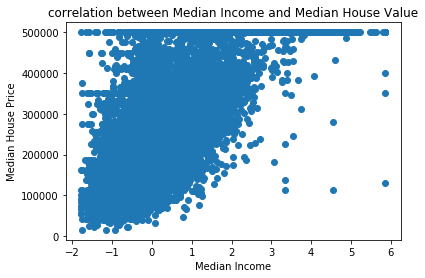

In [14]:
# draw a scatter plot of median_income with median_house_value
plt.scatter(HTrain[['median_income']],HTrain[['median_house_value']])
plt.xlabel('Median Income')
plt.ylabel('Median House Price')
plt.title("correlation between Median Income and Median House Value")

<p><h3><font color = purple>Quiz 2: What is the correlation between 'median_income' and 'median_house_value'? </font></h3></p>

<p><h4><font color = purple>
1. 0.80 <br><br>
2. 0.42 <br><br>
3. 0.96 <br><br>
4. 0.69 </font></h4></p>


In [15]:
HTrain['median_income'].corr(HTrain['median_house_value'])

0.6906466061467708

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [17]:
lin_reg = LinearRegression()   # creating an instance of Linear Regression 

In [18]:
lin_reg.fit(HTrain[['median_income']], HTrain['median_house_value'])   # build a linear regression model median_income vs median_house_value

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
lin_reg.coef_     # The coefficient of medain_income (m or B1(beta))

array([79664.90785833])

In [20]:
lin_reg.intercept_    # The intercept (ie: c or B0(beta))

206771.86405797795

In [21]:
lin_reg.score(HTrain[['median_income']],HTrain['median_house_value'])

0.47699273458205255

In [22]:
y_pred_train = lin_reg.predict(HTrain[['median_income']])
y_pred_train[:5]

array([181147.30465315, 204332.52998299, 218749.38740458, 125916.23161656,
       193501.01668457])

In [23]:
lin_rmse = np.sqrt(mean_squared_error(HTrain['median_house_value'], y_pred_train))
lin_rmse

83614.87409655548

Text(0.5, 1.0, 'Linear Regression on median_income ~ median_house_value')

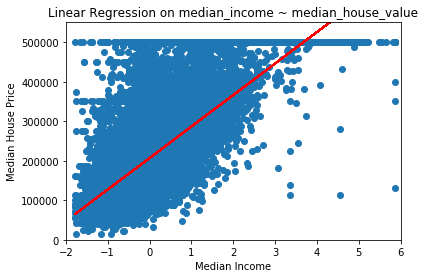

In [24]:
plt.scatter(HTrain[['median_income']],HTrain['median_house_value'])
plt.plot(HTrain[['median_income']],y_pred_train,'r')
plt.axis([-2,6,0,550000])
plt.xlabel('Median Income')
plt.ylabel('Median House Price')
plt.title('Linear Regression on median_income ~ median_house_value')

<p><h2><font color = DarkBlue> Best fit using Gradient Descent </font></h2></p>

In [25]:
from sklearn.linear_model import SGDRegressor

In [26]:
gdreg = SGDRegressor()

In [27]:
gdreg.fit(HTrain[['median_income']], HTrain['median_house_value'])

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [28]:
gdreg.intercept_

array([208097.12551905])

In [29]:
gdreg.coef_

array([79757.54602818])

In [30]:
gdreg.score(HTrain[['median_income']], HTrain['median_house_value'])

0.4768606076839559

In [31]:
y_pred_gd = gdreg.predict(HTrain[['median_income']])

Text(0.5, 1.0, 'Best fit using Gradient Descent')

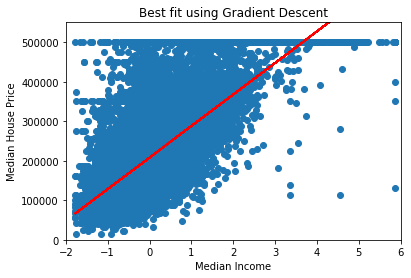

In [32]:
plt.scatter(HTrain[['median_income']],HTrain['median_house_value'])
plt.plot(HTrain[['median_income']],y_pred_gd,'r')
plt.axis([-2,6,0,550000])
plt.xlabel('Median Income')
plt.ylabel('Median House Price')
plt.title('Best fit using Gradient Descent')

<p><h2><font color = DarkBlue> 2. Multiple Linear Regression: </font></h2></p>

In [33]:
model_all = LinearRegression()

In [34]:
HTrain.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1.267645,-1.367976,0.346478,0.224718,0.214986,0.772251,0.322924,-0.321654,103000.0
1,0.703627,-0.871699,1.617807,0.342065,0.596500,-0.098440,0.670799,-0.030620,382100.0
2,-0.454356,-0.455012,-1.957806,-0.338639,-0.490815,-0.450778,-0.427755,0.150349,172600.0
3,1.227714,-1.377340,0.584852,-0.556832,-0.404974,-0.006602,-0.378059,-1.014947,93400.0
4,-0.114948,0.537543,1.141059,-0.116322,-0.252369,-0.486983,-0.312669,-0.166583,96500.0


In [35]:
X_train = HTrain.drop('median_house_value', axis = 1)
X_train.head()
                                           

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,1.267645,-1.367976,0.346478,0.224718,0.214986,0.772251,0.322924,-0.321654
1,0.703627,-0.871699,1.617807,0.342065,0.596500,-0.098440,0.670799,-0.030620
2,-0.454356,-0.455012,-1.957806,-0.338639,-0.490815,-0.450778,-0.427755,0.150349
3,1.227714,-1.377340,0.584852,-0.556832,-0.404974,-0.006602,-0.378059,-1.014947
4,-0.114948,0.537543,1.141059,-0.116322,-0.252369,-0.486983,-0.312669,-0.166583


In [36]:
y_train = HTrain['median_house_value']
y_train.head()

0    103000.0
1    382100.0
2    172600.0
3     93400.0
4     96500.0
Name: median_house_value, dtype: float64

In [37]:
model_all.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
model_all.coef_

array([-85413.28005747, -90669.136247  ,  14885.95835764, -17862.58294108,
        48757.37209674, -43589.91735845,  17717.71485854,  77013.87535191])

In [39]:
model_all.intercept_

206640.6370318638

In [40]:
model_all.score(X_train,y_train)

0.6400947924305294

In [41]:
y_pred_all = model_all.predict(X_train)

In [42]:
rmse_all = np.sqrt(mean_squared_error(y_train, y_pred_all))
rmse_all

69362.34135238081

<p><h2><font color = DarkBlue> Adding one by one all the features to understand Multiple Linear Regression </font></h2></p>

In [43]:
HTrain.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924485,-0.101818,0.038676,0.063064,0.094276,0.049306,-0.017040,-0.046349
latitude,-0.924485,1.000000,0.005296,-0.029224,-0.059998,-0.102499,-0.064061,-0.076571,-0.142983
housing_median_age,-0.101818,0.005296,1.000000,-0.360922,-0.320624,-0.292283,-0.302796,-0.121711,0.103706
total_rooms,0.038676,-0.029224,-0.360922,1.000000,0.930489,0.857936,0.920482,0.198268,0.133989
total_bedrooms,0.063064,-0.059998,-0.320624,0.930489,1.000000,0.878932,0.980255,-0.009141,0.047980
population,0.094276,-0.102499,-0.292283,0.857936,0.878932,1.000000,0.907452,0.004122,-0.026032
households,0.049306,-0.064061,-0.302796,0.920482,0.980255,0.907452,1.000000,0.012776,0.063714
median_income,-0.017040,-0.076571,-0.121711,0.198268,-0.009141,0.004122,0.012776,1.000000,0.690647
median_house_value,-0.046349,-0.142983,0.103706,0.133989,0.047980,-0.026032,0.063714,0.690647,1.000000


<p><h4><font color = DarkGreen> Model with 'logitude' variable </font></h4></p>

In [44]:
model1 = LinearRegression()

In [45]:
model1.fit(X_train[['longitude']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
model1.intercept_

207161.06474598034

In [47]:
model1.coef_

array([-5353.18054039])

In [48]:
model1.score(X_train[['longitude']],y_train)

0.0021482189561508047

<p><h4><font color = DarkGreen> Model with both 'logitude' and 'latitude' variables </font></h4></p>

In [49]:
model1.fit(X_train[['longitude','latitude']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
model1.coef_

array([-141889.12431787, -147795.69758896])

In [51]:
model1.intercept_

207084.4075166661

In [52]:
model1.score(X_train[['longitude','latitude']],y_train)

0.23977500440286748

<p><h3><font color = Purple> Quiz 3: Build a model with the variables  'logitude' , 'latitude' and 'housing_median_age'. What is the coefficient of 'housing_median_age' variable? </font></h3></p>
<p><h4><font color = purple>
1. -143091.95 <br><br>
2. -148898.94 <br><br>
3. 5180.33 <br><br>
4. -1803.02 </font></h4></p>

In [53]:
model1.fit(X_train[['longitude','latitude','housing_median_age']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
model1.coef_

array([-143091.95032316, -148898.94074324,   -1803.0265797 ])

In [55]:
model1.intercept_

207078.21161327386

In [56]:
model1.score(X_train[['longitude','latitude','housing_median_age']],y_train)

0.24000307748194905

<p><h4><font color = DarkGreen> Model with logitude, latitude, housing_median_age and total_rooms variables </font></h4></p>

In [57]:
model1.fit(X_train[['longitude','latitude','housing_median_age','total_rooms']],y_train)
print("Coefficients : ",model1.coef_)
print("Intercept : ", model1.intercept_)
model1.score(X_train[['longitude','latitude','housing_median_age','total_rooms']],y_train)

Coefficients :  [-139918.19489232 -145458.44039198    5180.33149439   18588.32272379]
Intercept :  207044.09690195063


0.26221824117424786

<p><h3><font color = Purple>Quiz 4: For the above model what is the interpretation of the coefficient of 'total_rooms'? </font></h3></p>
<p><h4><font color = purple>
1. For an increase of 1 in the 'median_house_value' the 'total_rooms' decreases by approximately 18588.32 <br><br>
2. For an increase of 1 in 'total_rooms' the 'median_house_value' increases by approximately 18588.32 <br><br>
3. For an increase of 1 in 'total_rooms' the 'median_house_value' decreases by approximately 18588.32 <br><br>
4. For an increase of 1 in the 'median_house_value' the 'total_rooms' increases by approximately 18588.32 </font></h4></p>


<p><h4><font color = DarkGreen> Model with 'longitude','latitude','housing_median_age','total_rooms','total_bedrooms' varaibles </font></h4></p>

In [58]:
model1.fit(X_train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms']],y_train)
print("Coefficients : ",model1.coef_)
print("Intercept : ", model1.intercept_)
model1.score(X_train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms']],y_train)

Coefficients :  [-140821.79695263 -148740.880461      6374.50953443   88723.50645406
  -74804.09155293]
Intercept :  207153.79553383638


0.31771834380202746

<p><h3><font color = Purple> Quiz 5: Suppose we add 'population' variable to our previous model. Is it possible for the model R2 to decrease from 0.31 to 0.26? </font></h3></p>
<p><h4><font color = purple>
1. No, the model's R2 value can only decrease to 0.30 by adding new variable. <br><br>
2. No, the model's R² value can not decrease at all by adding new variable. <br><br>
3. Yes, the R² value could decrease to 0.26 </font></h4></p>

<p><h4><font color = DarkGreen> Model with' longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population' </font></h4></p>

In [59]:
model1.fit(X_train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population']],y_train)
print("Coefficients : ",model1.coef_)
print("Intercept : ", model1.intercept_)
model1.score(X_train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population']],y_train)

Coefficients :  [-144389.62331851 -155699.63277662    6583.01551464  108502.58659167
  -38029.63257305  -62562.8816911 ]
Intercept :  207020.6342050893


0.3801845000742564

<p><h4><font color = DarkGreen> Model with 'longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households' variables </font></h4></p>

In [60]:
model1.fit(X_train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households']],y_train)
print("Coefficients : ",model1.coef_)
print("Intercept : ", model1.intercept_)
model1.score(X_train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households']],y_train)

Coefficients :  [-139798.10182907 -151645.85741153    6391.26182068  108158.05257741
  -72441.0594132   -71027.870383     43062.25888446]
Intercept :  207121.53176075255


0.3840491803301826

<p><h4><font color = DarkGreen> Model with 'longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income' variables </font></h4></p>

In [61]:
model1.fit(X_train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']],y_train)
print("Coefficients : ",model1.coef_)
print("Intercept : ", model1.intercept_)
model1.score(X_train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']],y_train)

Coefficients :  [-85413.28005747 -90669.136247    14885.95835764 -17862.58294108
  48757.37209674 -43589.91735845  17717.71485854  77013.87535191]
Intercept :  206640.6370318638


0.6400947924305294

<p><h2><font color = DarkBlue> Effect of adding variables on R2 </font></h2></p>

<img src = "images/R2Effect.png">

<p><h2><font color = DarkBlue> Feature Selection Techniques </font></h2></p>

<p><h3><font color = Blue> 1. Applying SelectKBest Feature Selection Method </font></h3></p>

In [62]:
from sklearn.feature_selection import SelectKBest, f_regression

In [63]:
select_feature = SelectKBest(f_regression,k=6).fit(X_train, y_train)

In [64]:
select_feature.scores_

array([3.55434501e+01, 3.44579030e+02, 1.79495552e+02, 3.01823325e+02,
       3.80956840e+01, 1.11961694e+01, 6.72961323e+01, 1.50574391e+04])

In [65]:
select_feature.pvalues_

array([2.54505126e-09, 3.82179753e-76, 1.01919784e-40, 5.20398942e-67,
       6.89318215e-10, 8.21491618e-04, 2.50682998e-16, 0.00000000e+00])

In [66]:
selected_features_df = pd.DataFrame({'Feature':list(X_train.columns),
                                     'P_values':select_feature.pvalues_})
selected_features_df.sort_values(by='P_values', ascending=True)

,Feature,P_values
7,median_income,0.000000e+00
1,latitude,3.821798e-76
3,total_rooms,5.203989e-67
2,housing_median_age,1.019198e-40
6,households,2.506830e-16
4,total_bedrooms,6.893182e-10
0,longitude,2.545051e-09
5,population,8.214916e-04


In [67]:
X_train_new = select_feature.transform(X_train)
X_train_new.shape

(16512, 6)

In [68]:
model_kbest = model_all.fit(X_train_new,y_train)

In [69]:
model_kbest.coef_

array([ -7201.82086955,  24397.45111862, -54757.3570668 ,  63885.16881336,
          784.47820083,  93449.65845946])

In [70]:
model_kbest.score(X_train_new,y_train)

0.5540145192388106

In [71]:
y_pred_kbest = model_kbest.predict(X_train_new)

In [72]:
lin_rmse_kbest = np.sqrt(mean_squared_error(y_train, y_pred_kbest))
lin_rmse_kbest

77212.93113565829

<p><h3><font color = Blue> 2. Applying Recursive Feature Elimination Method </font></h3></p>

In [73]:
from sklearn.feature_selection import RFE

In [74]:
rfe = RFE(estimator=model_all, step=1)

In [75]:
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=None, step=1, verbose=0)

In [76]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,longitude,1
1,latitude,1
4,total_bedrooms,1
7,median_income,1
5,population,2
3,total_rooms,3
6,households,4
2,housing_median_age,5


In [77]:
X_train_rfe = rfe.transform(X_train)
X_train.shape

(16512, 8)

In [78]:
model_rfe = model_all.fit(X_train_rfe,y_train)

In [79]:
model_rfe.coef_

array([ -99769.10837052, -103067.90916562,    6308.59029907,
         70148.4231635 ])

In [80]:
model_rfe.intercept_

206715.37035221973

In [81]:
model_rfe.score(X_train_rfe,y_train)

0.5901689024984469

In [82]:
y_pred_rfe = model_rfe.predict(X_train_rfe)

In [83]:
lin_rmse_rfe = np.sqrt(mean_squared_error(y_train, y_pred_rfe))
lin_rmse_rfe

74017.1116468229

<p><h2><font color = DarkBlue> Predictions on Test Data </font></h2></p>

In [84]:
HTest = pd.read_csv("https://storage.googleapis.com/dimensionless/ML_with_Python/Chapter%203%20Linear%20Regression/housing_test.csv")

In [85]:
HTest.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.279366,0.200449,-0.289187,-0.518327,-0.242831,-0.029562,-0.367597,-1.152489,47700.0
1,0.054757,-0.230283,0.108104,0.140833,-0.242831,0.123206,0.220915,-0.705015,45800.0
2,-1.432653,1.015093,1.856182,0.547423,-0.242831,-0.101972,1.212230,-0.205588,500001.0
3,0.424114,-0.632923,-0.924851,0.190339,-0.242831,0.246834,-0.011874,0.982710,218600.0
4,-1.178096,0.462633,0.425936,-0.130532,-0.242831,-0.320086,-0.187120,-0.076678,278000.0


In [92]:
X_test = HTest[['longitude','latitude','total_bedrooms','median_income']]
X_test.head()

,longitude,latitude,total_bedrooms,median_income
0,0.279366,0.200449,-0.242831,-1.152489
1,0.054757,-0.230283,-0.242831,-0.705015
2,-1.432653,1.015093,-0.242831,-0.205588
3,0.424114,-0.632923,-0.242831,0.982710
4,-1.178096,0.462633,-0.242831,-0.076678


In [93]:
y_test = HTest['median_house_value']
y_test.head()

0     47700.0
1     45800.0
2    500001.0
3    218600.0
4    278000.0
Name: median_house_value, dtype: float64

In [90]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((16512, 8), (16512,), (4128, 8), (4128,))

In [95]:
y_pred_test = model_all.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
SSE = np.sum((y_pred_test-y_test)**2)
SST = np.sum((y_test-np.mean(y_train))**2)
r2_test = 1 - SSE/SST
print("Test RMSE : ", rmse_test)
print("Test SSE : ", SSE)
print("Test SST : ", SST)
print("Test R2 : ", r2_test)

Test RMSE :  74625.82520799845
Test SSE :  22988888916759.72
Test SST :  54105533852322.5
Test R2 :  0.5751102099924496
